# Main Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
import os

# model_selection
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from keras import layers , Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load datasest

#check if the dataset exist or not

path_file = r"D:\Churn_Modelling.csv"

if os.path.exists(path_file):
    df = pd.read_csv(path_file)
    print(df.head())

else:
    print("Soory , your file not exist.")

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# Data Pre-Processing

In [5]:
df.shape

(10000, 14)

In [6]:
if 'RowNumber' in df.columns:
    df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
else:
    print("Columns 'RowNumber', 'CustomerId', or 'Surname' not found in the DataFrame.")


In [7]:
df.shape

(10000, 11)

In [28]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [13]:
# Check Null

df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

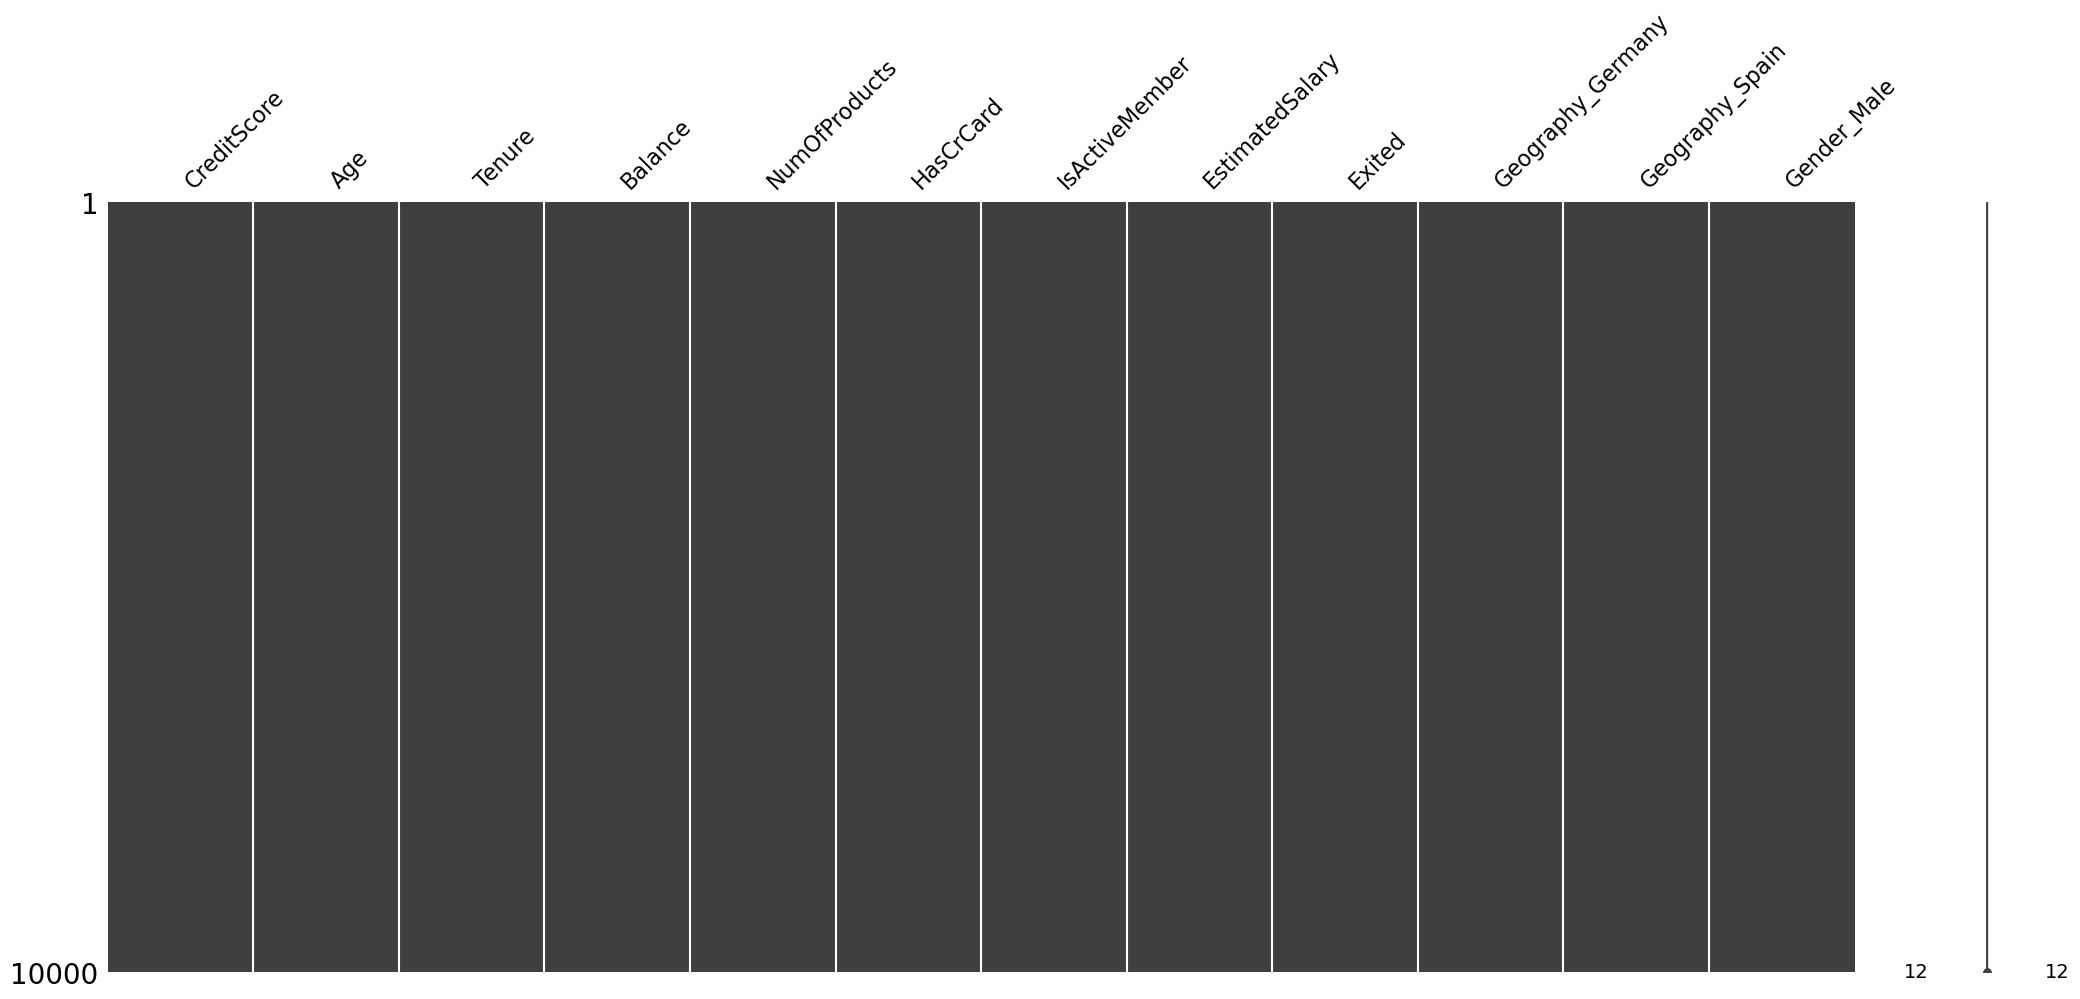

In [49]:
mis.matrix(df);

In [16]:
df['Geography'].nunique()

3

In [14]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

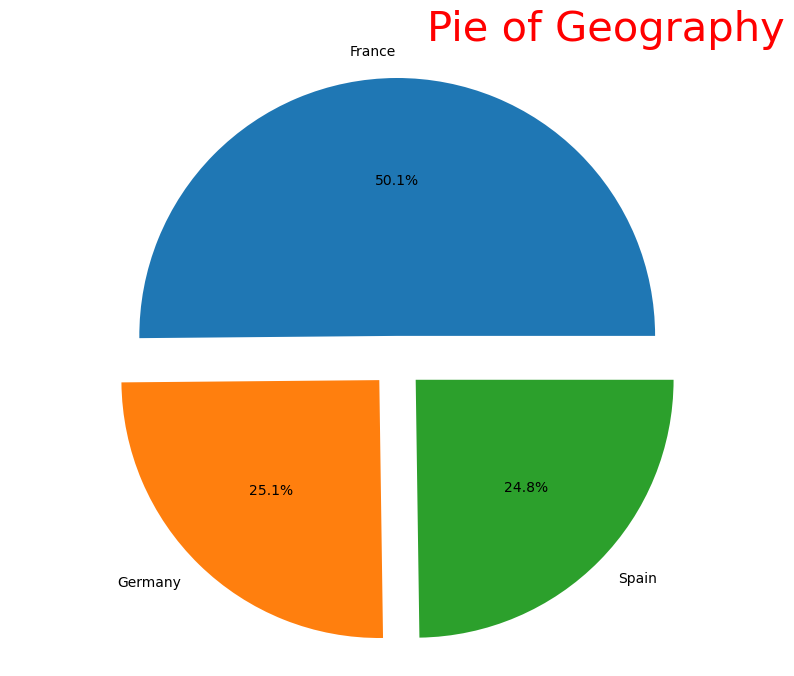

In [25]:
plt.figure(figsize=(10,8))
plt.pie([5014 , 2509 , 2477] , labels=["France" , "Germany" , "Spain"] , explode=[0.1,0.1,0.1] , autopct="%1.1f%%")
plt.axis("equal")
plt.title("Pie of Geography" , fontsize=30 , loc="right" , c="r")
plt.show()

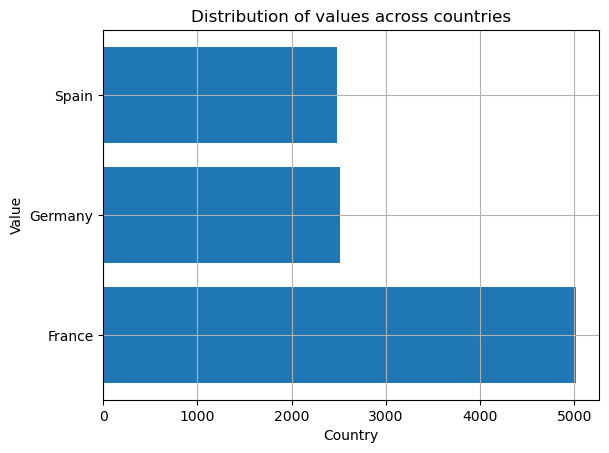

In [37]:

# Data labels and values
data = ["France", "Germany", "Spain"]
values = [5014, 2509, 2477]

# Create the bar chart
plt.barh(data, values)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Value")
plt.title("Distribution of values across countries")
plt.grid(True)
# Show the chart
plt.show()


In [26]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

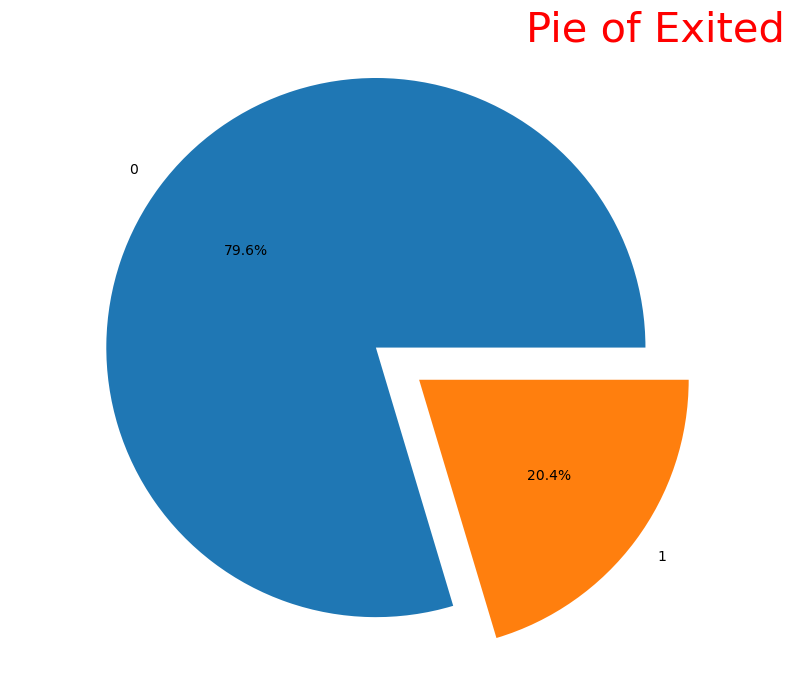

In [27]:
plt.figure(figsize=(10,8))
plt.pie([7963 , 2037 ] , labels=["0" , "1" ] , explode=[0.1,0.1] , autopct="%1.1f%%")
plt.axis("equal")
plt.title("Pie of Exited" , fontsize=30 , loc="right" , c="r")
plt.show()

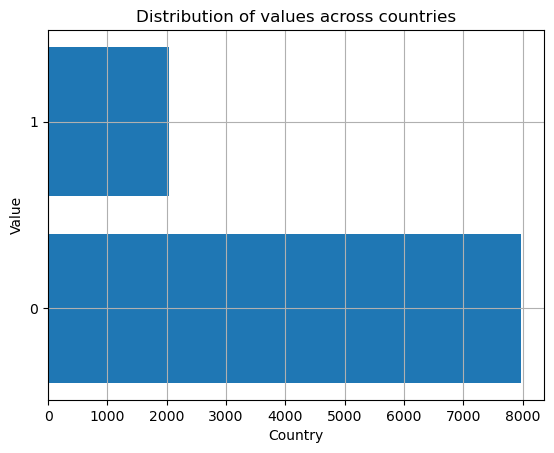

In [38]:

# Data labels and values
data = ["0", "1"]
values = [7963 , 2037]

# Create the bar chart
plt.barh(data, values)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Value")
plt.title("Distribution of values across countries")
plt.grid(True)
# Show the chart
plt.show()


In [39]:
df['Gender'].value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

In [44]:
X = df.drop(columns=["Exited"] , axis=1)
y = df["Exited"]

In [50]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=123 , shuffle=True)
print("X_train shape is === ",X_train.shape)
print("X_test shape is === ",X_test.shape)
print("y_train shape is === ",y_train.shape)
print("y_test shape is === ",y_test.shape)

X_train shape is ===  (8000, 11)
X_test shape is ===  (2000, 11)
y_train shape is ===  (8000,)
y_test shape is ===  (2000,)


In [47]:
scaler = StandardScaler()

scaler.fit_transform(X_train , y_train)

array([[ 0.76549331, -0.84229272,  1.72352467, ..., -0.57946723,
        -0.57677292,  0.90682052],
       [-0.4455051 ,  0.01205581,  1.72352467, ..., -0.57946723,
        -0.57677292, -1.10275404],
       [ 1.38651814, -0.36765465, -0.69673114, ..., -0.57946723,
         1.73378459,  0.90682052],
       ...,
       [ 0.36182718, -1.79156887, -0.35098031, ..., -0.57946723,
        -0.57677292,  0.90682052],
       [-0.0728902 , -0.84229272, -0.00522948, ..., -0.57946723,
        -0.57677292,  0.90682052],
       [ 0.37217759, -0.36765465, -0.35098031, ..., -0.57946723,
        -0.57677292,  0.90682052]])

In [52]:
imputer = SimpleImputer(missing_values=np.nan , strategy="mean")
imputer.fit_transform(X_train , y_train)

array([[724.,  30.,  10., ...,   0.,   0.,   1.],
       [607.,  39.,  10., ...,   0.,   0.,   0.],
       [784.,  35.,   3., ...,   0.,   1.,   1.],
       ...,
       [685.,  20.,   4., ...,   0.,   0.,   1.],
       [643.,  30.,   5., ...,   0.,   0.,   1.],
       [686.,  35.,   4., ...,   0.,   0.,   1.]])

In [91]:
# setting up the layers of Neural Network

model = Sequential([  
                          layers.Dense(11 , input_dim=11),
                          layers.Dense(11, activation='sigmoid'),
                          layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 11)                132       
                                                                 
 dense_20 (Dense)            (None, 11)                132       
                                                                 
 dense_21 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model.compile(optimizer="adam" , loss="binary_crossentropy" , metrics=["accuracy"])

In [93]:
history = model.fit(X_train,y_train,batch_size=50,epochs=50,verbose=1,validation_split=0.2)


Epoch 1/50
128/128 [==============================] - 1s 3ms/step - loss: 0.7944 - accuracy: 0.3591 - val_loss: 0.6381 - val_accuracy: 0.7312
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.7827 - val_loss: 0.5378 - val_accuracy: 0.7912
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7986 - val_loss: 0.5198 - val_accuracy: 0.7919
Epoch 4/50
128/128 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7984 - val_loss: 0.5124 - val_accuracy: 0.7919
Epoch 5/50
128/128 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7984 - val_loss: 0.5112 - val_accuracy: 0.7919
Epoch 6/50
128/128 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7984 - val_loss: 0.5193 - val_accuracy: 0.7919
Epoch 7/50
128/128 [==============================] - 1s 4ms/step - loss: 0.5146 - accuracy: 0.7984 - val_loss: 0.5209 - val_accuracy: 0.7919
Epoch 

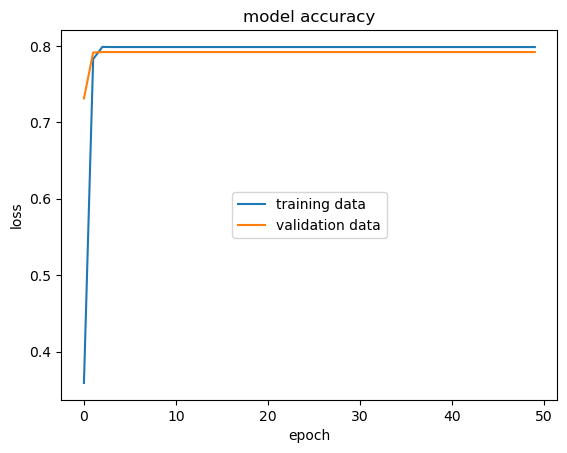

In [94]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'center')

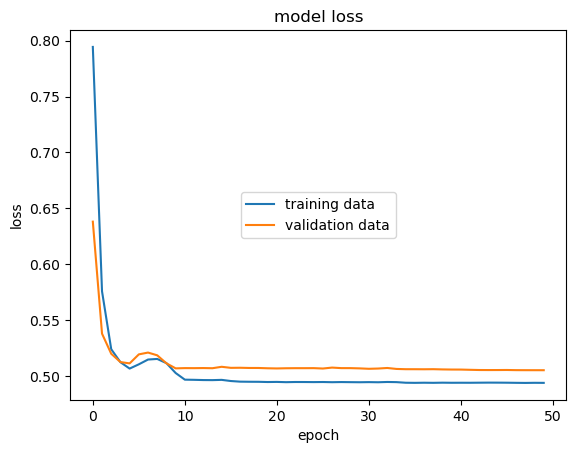

In [95]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'center')

In [96]:
model_pred = model.predict(X_test)
np.round(model_pred[:4])

63/63 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [97]:
model_pred = model_pred.argmax(axis=-1)
model_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)